#Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](https://drive.google.com/uc?id=1SyQQiSPt6qKFHeDyT8Shher8XFfMXBYj)

### Import TensorFlow

In [26]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.2.0


# The Dataset
### Import MNIST

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

### Shapes of Imported Arrays

In [28]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

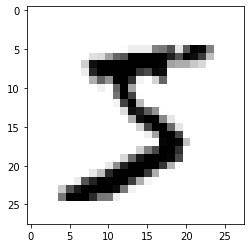

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

### Display Labels

In [30]:
y_train[0]

5

In [31]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


#One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [33]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Display Encoded Labels

In [34]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Neural Networks

### Linear Equations

![Single Neuron](https://drive.google.com/uc?id=1PHndrA5lLsh2nTXFVo-Y46vNjemRl4Eu)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](https://drive.google.com/uc?id=1k-pOyPWPftKkdMvIJ82AcnDq0gJeShj3)

### Neural Networks

![Neural Network with 2 hidden layers](https://drive.google.com/uc?id=1eGLo8-P8rhuQo2k_Y1vUX1PWpS9HJX6x)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

#Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [35]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print('x_train_reshaped shape: ',x_train_reshaped.shape)
print('x_test_reshaped shape: ',x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [36]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [0]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)



### Display Normalized Pixel Values

In [38]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

#Creating a Model
### Creating the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation  = 'relu', input_shape= (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax'),
    
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](https://drive.google.com/uc?id=1kX4IcvHdzEWuPp81509k3TlPSYgPz8h3)

### Compiling the Model

In [40]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Training the Model

### Training the Model

In [41]:
model.fit(x_train_norm, y_train_encoded, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3796 - accuracy: 0.8895
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1853 - accuracy: 0.9470
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1402 - accuracy: 0.9603


### Evaluating the Model

In [42]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ',accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9619
Test set accuracy:  96.1899995803833


#Predictions

### Predictions on Test Set

In [43]:
preds = model.predict(x_test_norm)
print('Shape of Prediction: ', preds.shape )

Shape of Prediction:  (10000, 10)


### Plotting the Results

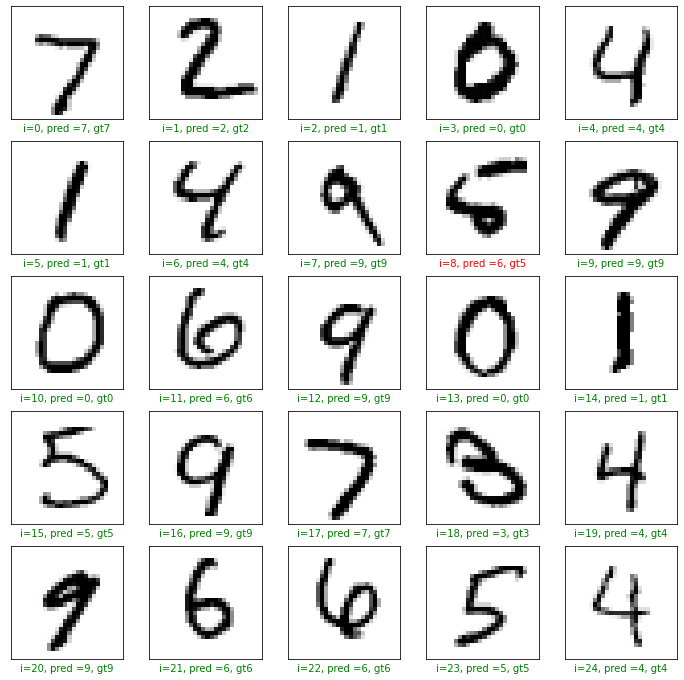

In [44]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred ={}, gt{}'.format(start_index+i, pred,gt), color =col)
    plt.imshow(x_test[start_index+i], cmap = 'binary')
    
plt.show()

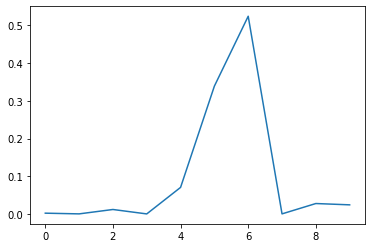

In [45]:
plt.plot(preds[8])
plt.show()